In [1]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Sequential

점진적으로 모델 생성

In [2]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [3]:
model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-0.01008996,  0.26300573, -0.05608071, -0.29865742,  0.2379793 ,
         -0.00616065,  0.1096378 , -0.13008848, -0.24566968,  0.02750143,
         -0.15655053, -0.04709157,  0.24581224, -0.01848105,  0.25719213,
          0.22201931,  0.28043216, -0.17195337,  0.03082031,  0.23351508,
          0.26225805, -0.07424328, -0.01721492, -0.26104984,  0.28490424,
         -0.15467758, -0.24843496, -0.10967591, -0.05095205,  0.18172988,
         -0.12683026, -0.02776036,  0.06775066, -0.12695405, -0.24969389,
         -0.09596351, -0.19520935,  0.17596495, -0.15149128,  0.04828736,
         -0.10497405, -0.03114322, -0.23712268,  0.07008272,  0.17012867,
          0.27675354,  0.19324544, -0.2914534 , -0.27626687,  0.01566482,
         -0.1158812 , -0.14399417, -0.2827512 ,  0.27583003,  0.06364667,
          0.22009635,  0.25567842,  0.27222258,  0.01444507, -0.01271489,
         -0.13622293, -0.0898277 , -0.24296

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


name 매개변수로 모델과 층에 이름 지정

In [5]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_first_layer (Dense)       (None, 64)                256       
_________________________________________________________________
my_last_layer (Dense)        (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


모델의 입력 크기를 미리 지정

In [6]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

In [7]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                256       
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


# 함수형 API

dense층이 2개인 함수형 모델

In [9]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [10]:
inputs = keras.Input(shape=(3,), name="my_input")

In [11]:
inputs.shape

TensorShape([None, 3])

In [12]:
inputs.dtype

tf.float32

In [13]:
features = layers.Dense(64, activation="relu")(inputs)
features.shape

TensorShape([None, 64])

In [14]:
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_input (InputLayer)        [(None, 3)]               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


다중입력, 다중출력 함수형 모델

In [15]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

입력과 타겟을 리스트로 전달

In [16]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 1s 10ms/step - loss: 24.2815 - priority_loss: 0.3390 - department_loss: 23.9425 - priority_mean_absolute_error: 0.5071 - department_accuracy: 0.5734


입력과 타겟을 딕셔너리로 전달

In [17]:
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 1s 9ms/step - loss: 28.0205 - priority_loss: 0.3249 - department_loss: 27.6956 - priority_mean_absolute_error: 0.4929 - department_accuracy: 0.0656


함수형 api의 장점 : 층연결 구조

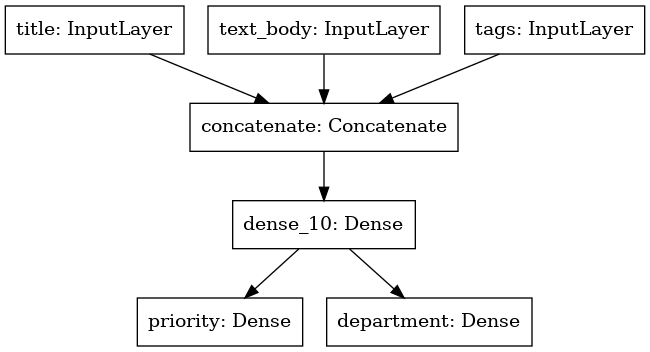

In [18]:
keras.utils.plot_model(model, "ticket_classifier.png")

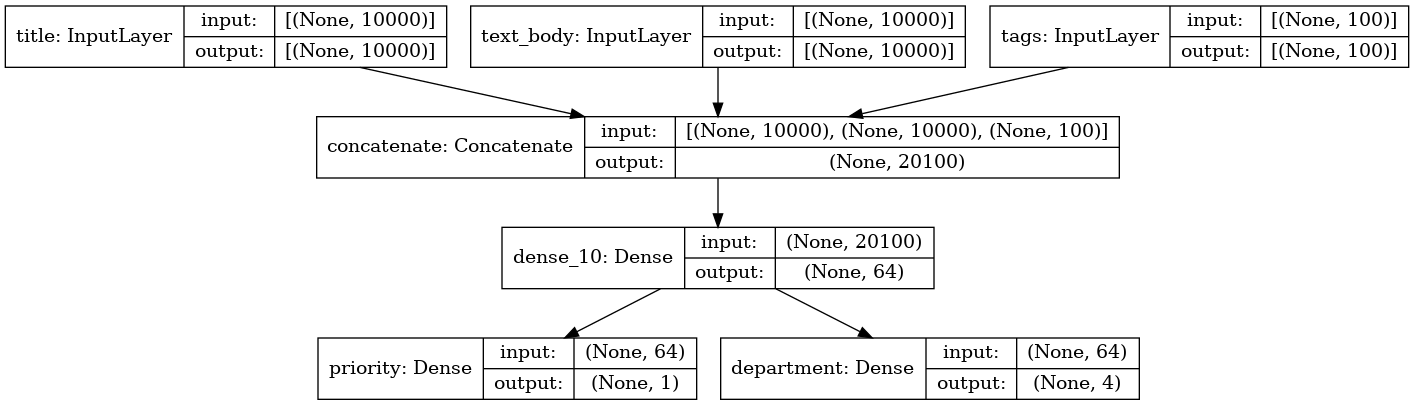

In [19]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

함수형 모델의 입력과 출력을 출력

In [20]:
model.layers

In [21]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [22]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

중간층의 출력으로 새로운 모델 생성

In [23]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

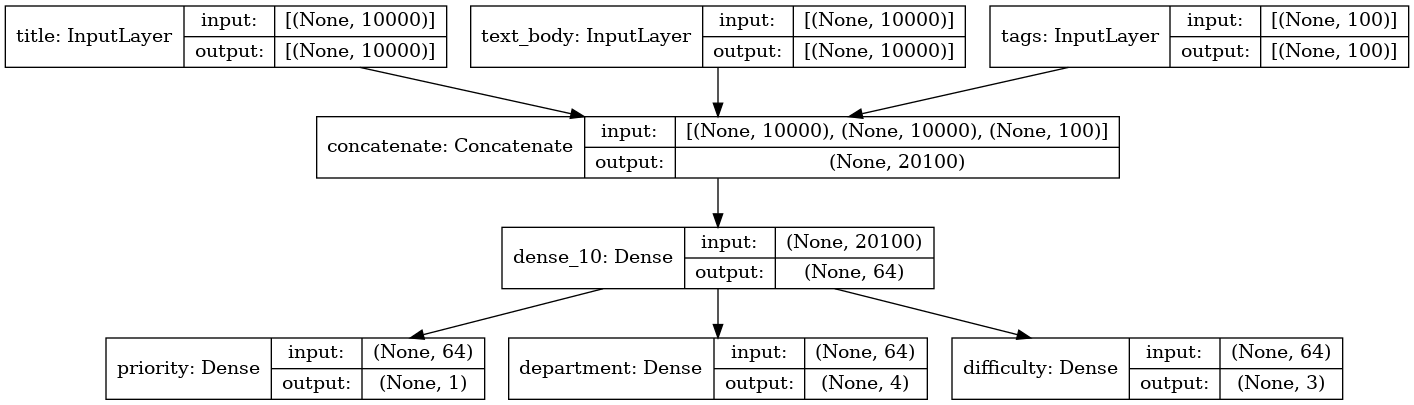

In [24]:
keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True)

# 모델 서브클래싱

In [25]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [26]:
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [27]:
model.compile(optimizer="rmsprop", loss=["mean_squared_error", "categorical_crossentropy"], metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data}, [priority_data, department_data], epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 1s 11ms/step - loss: 17.2135 - output_1_loss: 0.3249 - output_2_loss: 16.8886 - output_1_mean_absolute_error: 0.4929 - output_2_accuracy: 0.0602


여러방식을 혼합하여 사용하기

In [28]:
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

함수형 모델을 포함하여 만드는 것

In [29]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

# 조별 특별 미션  
사용자 정의 지표를 사용하는 모델

In [30]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/3
1563/1563 [==============================] - 12s 8ms/step - loss: 0.2989 - accuracy: 0.9114 - val_loss: 0.1498 - val_accuracy: 0.9577
Epoch 2/3
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1656 - accuracy: 0.9526 - val_loss: 0.1234 - val_accuracy: 0.9673
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.1097 - accuracy: 0.9723


사용자 정의 지표 생성

In [31]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

사용자 정의 지표 사용 모델 생성

In [32]:
model = get_mnist_model()
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels, epochs=3, validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 13s 8ms/step - loss: 0.2947 - accuracy: 0.9139 - rmse: 7.1804 - val_loss: 0.1409 - val_accuracy: 0.9586 - val_rmse: 7.3694
Epoch 2/3
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1649 - accuracy: 0.9531 - rmse: 7.3545 - val_loss: 0.1199 - val_accuracy: 0.9679 - val_rmse: 7.4042
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.1173 - accuracy: 0.9698 - rmse: 7.4305


다른 사용자 정의 지표 생성(mae)

In [33]:
class MeanAbsoluteError(keras.metrics.Metric):

    def __init__(self, name="mae", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mae_sum = self.add_weight(name="mae_sum", initializer="zeros")
        self.total_samples = self.add_weight(name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mae = tf.reduce_sum(tf.abs(y_true - y_pred))
        self.mae_sum.assign_add(mae)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return self.mae_sum / tf.cast(self.total_samples, tf.float32)

    def reset_state(self):
        self.mae_sum.assign(0.)
        self.total_samples.assign(0)

In [34]:
model = get_mnist_model()
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy", MeanAbsoluteError()])
model.fit(train_images, train_labels, epochs=3, validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 13s 8ms/step - loss: 0.2915 - accuracy: 0.9138 - mae: 56.0153 - val_loss: 0.1446 - val_accuracy: 0.9595 - val_mae: 56.0257
Epoch 2/3
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1654 - accuracy: 0.9544 - mae: 55.9040 - val_loss: 0.1261 - val_accuracy: 0.9647 - val_mae: 56.0080
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 0.1008 - accuracy: 0.9730 - mae: 56.1323


# 콜백 사용

In [35]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.h5",
        monitor="val_loss",
        save_best_only=True,
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.2987 - accuracy: 0.9115 - val_loss: 0.1569 - val_accuracy: 0.9589
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1645 - accuracy: 0.9543 - val_loss: 0.1346 - val_accuracy: 0.9641
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1370 - accuracy: 0.9630 - val_loss: 0.1123 - val_accuracy: 0.9713
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1230 - accuracy: 0.9678 - val_loss: 0.1104 - val_accuracy: 0.9740
Epoch 5/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.1166 - accuracy: 0.9712 - val_loss: 0.1038 - val_accuracy: 0.9768
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1110 - accuracy: 0.9723 - val_loss: 0.1055 - val_accuracy: 0.9770
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1035 - accuracy: 0.9753 - val_loss: 0.1128 - val_ac

In [36]:
model = keras.models.load_model("checkpoint_path.h5")

사용자 정의 콜백 생성

In [37]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.2983 - accuracy: 0.9111 - val_loss: 0.1501 - val_accuracy: 0.9571
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1684 - accuracy: 0.9531 - val_loss: 0.1313 - val_accuracy: 0.9640
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1410 - accuracy: 0.9615 - val_loss: 0.1194 - val_accuracy: 0.9678
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1262 - accuracy: 0.9678 - val_loss: 0.1139 - val_accuracy: 0.9732
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1219 - accuracy: 0.9701 - val_loss: 0.1073 - val_accuracy: 0.9745
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1119 - accuracy: 0.9727 - val_loss: 0.1101 - val_accuracy: 0.9754
Epoch 7/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.1051 - accuracy: 0.9749 - val_loss: 0.1119 - val_ac

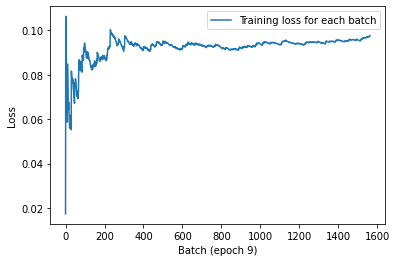

In [38]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))